# AccelerateAI

## Clustering: Solution to Assignment 10 - Q4

### Problem Statement

One of the large smart phone manufacturing giant is analyzing it's customer satisfaction and loyalty data. Here is a sample they have captured from a geography for certain period for analysis.

As a Data Scientist, you are tasked to analyze the segmentation pattern and recommend your inferences.

The dataset is here on GitHub - https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/ClassAssignment/Assignment10/Satisfaction_Loyalty.csv

Dataset has two features captured here for analysis consideration - Satisfactory index and Loyalty index of customers.

Leverage clustering methods and provide your inference.

### Solution

We will import libraries and load the dataset from the file provided.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("./Satisfaction_Loyalty.csv")

data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


We will plot a scatterplot to understand the spread between two features.

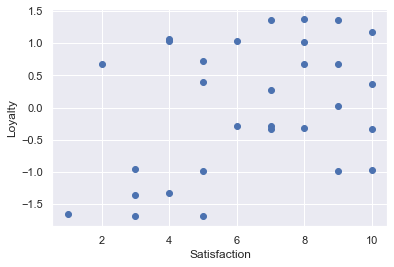

In [3]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [4]:
X = data.copy()

We will assume 2 clusters and try to fit using Kmeans first.

In [5]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [6]:
Clusters = X.copy()
Clusters['Cluster_Label'] = kmeans.fit_predict(X)

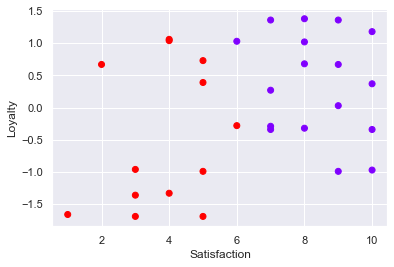

In [7]:
plt.scatter(Clusters['Satisfaction'],Clusters['Loyalty'], c=Clusters['Cluster_Label'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

This does not seem to be separated well. We will explore standardizing the data and then use elbow method to get optimal number of clusters.

In [8]:
from sklearn import preprocessing
X_standardized = preprocessing.scale(X)

X_standardized

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [9]:
wcss = []

for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(X_standardized)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.348079410290979,
 4.380320178840311,
 3.728283444358954,
 3.383922054516763,
 2.831048914624626,
 2.456557340612247,
 2.0984501433467706,
 1.8358439097895753,
 1.5900547016217281,
 1.3545143151372232,
 1.1546257116243859,
 1.0206530645455842,
 0.872753502634184,
 0.6366791702988839,
 0.5885745775368189,
 0.42313027513905704,
 0.3476288264895426,
 0.24721053307798674,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

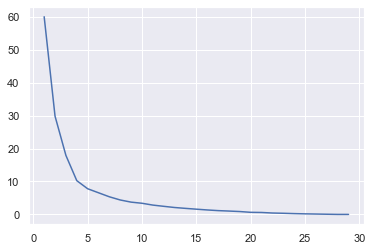

In [10]:
plt.plot(range(1,30),wcss)
plt.show()

Elbow method seems to show number of clusters = 4 as optimum. We will proceed with that and plot the data visually to understand clusters.

In [11]:
kmeans_new = KMeans(4)
kmeans.fit(X_standardized)
Cluster_new = X.copy()
Cluster_new['Cluster_Pred'] = kmeans_new.fit_predict(X_standardized)
Cluster_new.head()

,Satisfaction,Loyalty,Cluster_Pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2


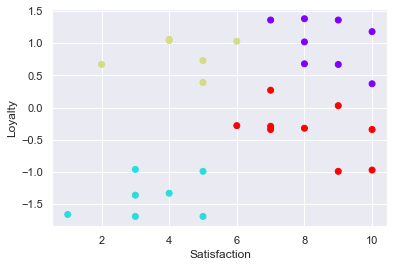

In [12]:
plt.scatter(Cluster_new['Satisfaction'],Cluster_new['Loyalty'], c=Cluster_new['Cluster_Pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Interpretation Points:

1.	We need to standardize and then apply clusters wherever necessary
2.	No. of optimum clusters can be determined by any of the methods such as Elbow method
3.	Here No. of Clusters = 4 seems optimal
4.	Post that, interpretation is important for the smartphone manufacturing giant.
- They want to have more customers in the HS+HL category (i.e. High Satisfaction and High Loyalty). They need to see how to formulate strategy to move other potential customers into this zone.
- They can only think of those customers who are in HL+LS and HS+LL zones.
- LS+LL (Both Low) can be tagged as alienated.


That's all. You can do further analysis.